In [1]:
%run '00_database_connectivity_setup.ipynb'
%matplotlib inline
from IPython.display import display
from IPython.display import HTML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline



# pd.set_option('display.max_rows', 2000)
# pd.set_option('display.max_columns', 1000)
conn.commit();

C:\Anaconda2\lib\site-packages\pandas\computation\__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [3]:
%%execsql
DROP TABLE IF EXISTS nate.alp1_15_sqlexec_0;
SELECT 
    sugarlib.sugar($$
         CREATE TABLE  nate.alp1_15_sqlexec_0 AS 
         SELECT *
FROM sudip.twenty_news_groups_vocabulary
$$);



In [10]:
sql = """
SELECT * from nate.alp1_15_todb_1
"""
df = psql.read_sql(sql, conn)
conn.commit()
display(df)

outlook  temperature  humidity   wind play  temperature_bin
0      sunny           85        85  false   no                6
1      sunny           80        90   true   no                5
2      sunny           72        95  false   no                4
3      sunny           69        70  false  yes                2
4      sunny           75        70   true  yes                5
5   overcast           83        78  false  yes                6
6   overcast           64        65   true  yes                1
7   overcast           72        90   true  yes                4
8   overcast           81        75  false  yes                6
9       rain           70        96  false  yes                3
10      rain           68        80  false  yes                2
11      rain           65        70   true   no                1
12      rain           75        80  false  yes                5
13      rain           71        80   true   no                3

label  count
0         talk.politics.guns    910
1                  sci.crypt    991
2             comp.windows.x    988
3                    sci.med    990
4         talk.politics.misc    775
5               misc.forsale    975
6            sci.electronics    984
7         talk.religion.misc    628
8   comp.sys.ibm.pc.hardware    982
9           rec.sport.hockey    999
10   comp.os.ms-windows.misc    985
11           rec.motorcycles    996
12        rec.sport.baseball    994
13             comp.graphics    973
14                 sci.space    987
15    soc.religion.christian    997
16                 rec.autos    990
17               alt.atheism    799
18     comp.sys.mac.hardware    963
19     talk.politics.mideast    940

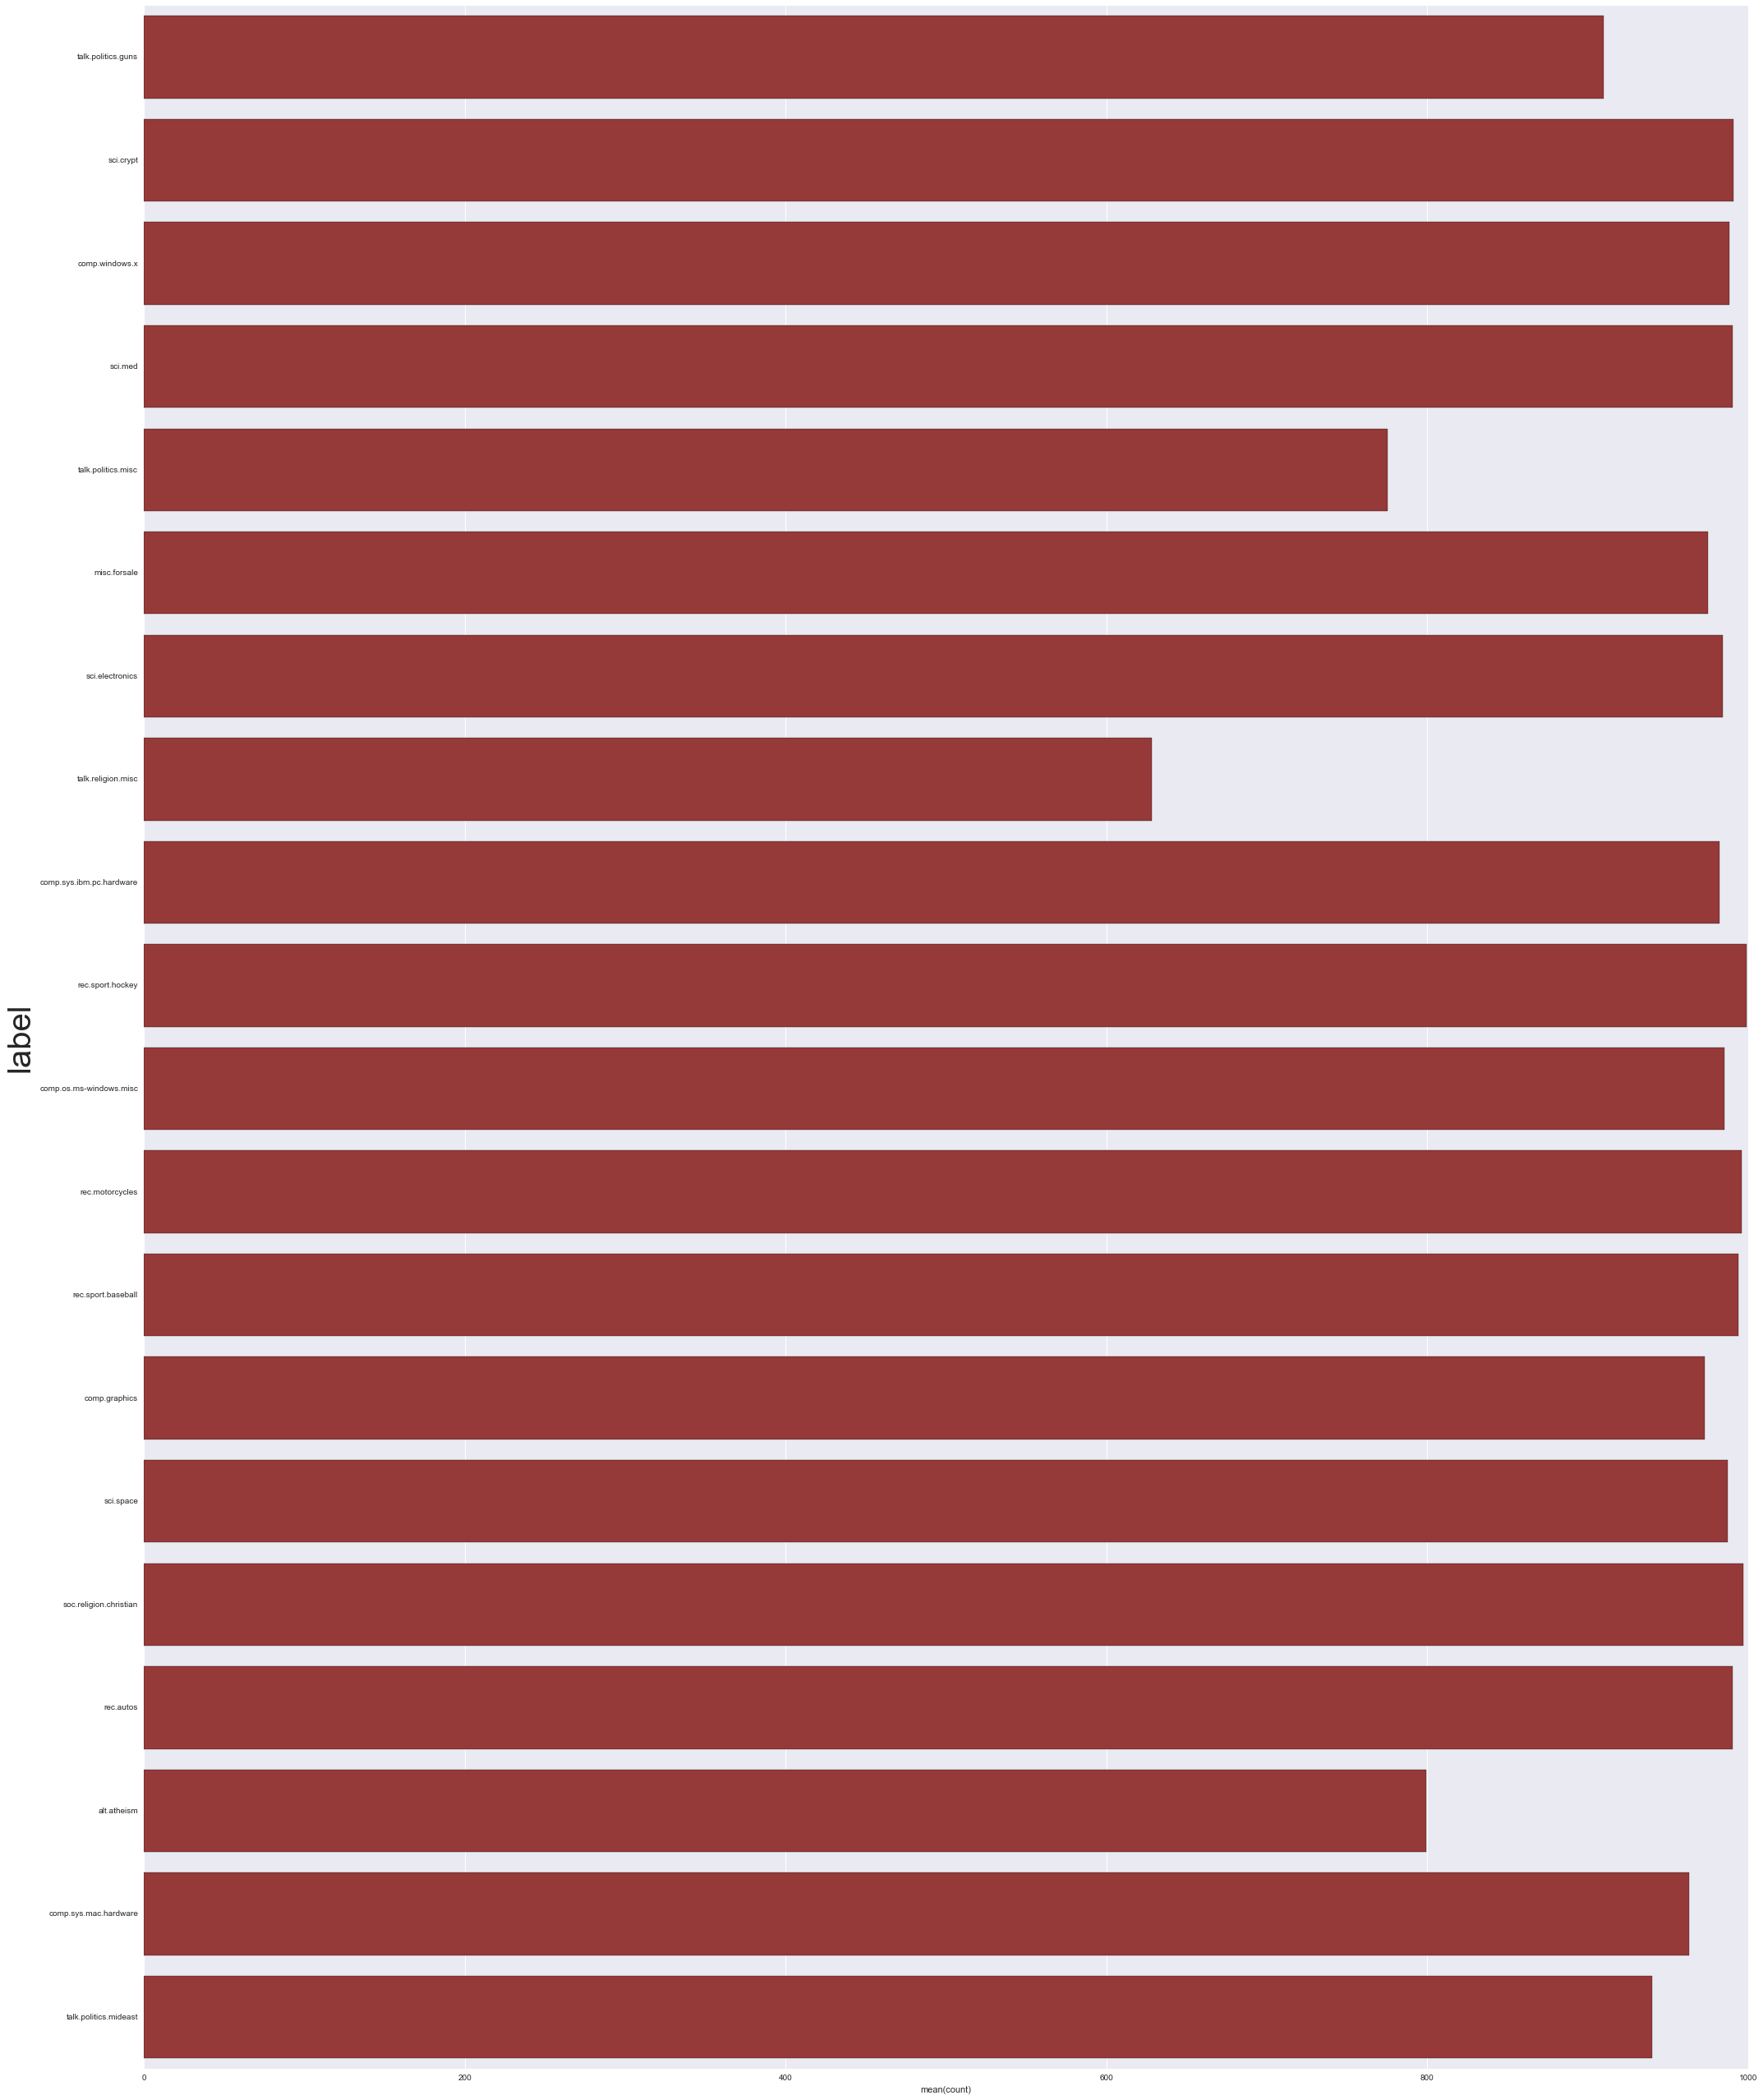

In [4]:
sql = """
SELECT label, count(contents)
FROM sudip.twenty_news_groups
GROUP BY label
ORDER BY random()
"""
df = psql.read_sql(sql, conn)
conn.commit()
display(df)

fig, ax = plt.subplots(figsize=(35, 45))
sns.barplot(x='count', y='label', color = 'brown', data=df, ax=ax)
ax.yaxis.label.set_size(40)

sns.plt.show()

In [25]:
# %%execsql
# DROP TABLE IF EXISTS nate.tb_test0;
#SELECT 
#    sugarlib.sugar($$
#         CREATE TABLE  nate.tb_test0 AS 
#         SELECT *
#         FROM nate.twenty_news_groups
# $$);


In [27]:
# sql = """
# SELECT *
#FROM nate.tb_test0
#
# """
# df = psql.read_sql(sql, conn)
# conn.commit()
# display(df)

In [23]:
# sql = """
# UPDATE nate.tb_test0
#SET contents = substring(contents from 6 for position('@' in contents))
#
# """
# df = psql.execute(sql, conn)
# conn.commit()
# display(df)

In [41]:
sql = """ select substring(contents from 0 for position('@' in contents)) from nate.twenty_news_groups;"""
df = psql.read_sql(sql, conn)
conn.commit()
display(df)

substring
0                                            From: aaron
1                                           From: kempmp
2                                   From: mathew <mathew
3                                          From: livesey
4                          From: Nanci Ann Miller <nm0w+
5                                            From: nyeda
6                                             From: cobb
7                                           From: jaeger
8                                              From: edm
9                                          From: madhaus
10                                         From: sandvik
11                                           From: bobbe
12                                             From: edm
13                                           From: perry
14                                        From: deguzman
15                                            From: jimh
16                                           From: decay
17                                           From: perry
18                                             From: mam
19                                            From: kmr4
20                                             From: dps
21                        From: "Robert Knowles" <p00261
22                                           From: keith
23                                            From: kmr4
24                                           From: qpliu
25                                           From: hyder
26                                      From: Alan.Olsen
27                                            From: danb
28                                             From: bil
29                                             From: bil
30                                           From: pauld
31                                           From: cmtan
32                                         From: forgach
33                        From: "Robert Knowles" <p00261
34                                             From: pww
35                                         From: sandvik
36                                         From: dgraham
37                                         From: acooper
38                                             From: bil
39                                           From: kadie
40                                            From: kmr4
41                                          From: darice
42                                         From: livesey
43                                          From: jgreen
44                                           From: aaron
45                                         From: bockamp
46                                           From: craig
47                                          From: raunoh
48                                          From: lilley
49                                        From: asecchia
50                                         From: gotsman
51                                          From: eczcaw
52                                             From: mek
53                                        From: I3150101
54                                           From: dlunt
55                                            From: tgl+
56                                            From: s127
57                             From: "kwansik kim" <kkim
58                                           From: frank
59                                          From: davidr
60                                    From: T.G.Nattress
61                       From: Jennifer Lynn Urso <ju23+
62                                        From: matt-dah
63                                             From: lee
64                                      From: MANDTBACKA
65                                           From: bobbe
66                                         From: davidla
67                                          From: matess
68                                         From: eball12
69                                          From: gorgen


In [38]:
sql = """ select split_part(contents, '@', 1) from nate.twenty_news_groups;"""
df = psql.read_sql(sql, conn)
conn.commit()
display(df)

split_part
0                                            From: aaron
1                                           From: kempmp
2                                   From: mathew <mathew
3                                          From: livesey
4                          From: Nanci Ann Miller <nm0w+
5                                            From: nyeda
6                                             From: cobb
7                                           From: jaeger
8                                              From: edm
9                                          From: madhaus
10                                         From: sandvik
11                                           From: bobbe
12                                             From: edm
13                                           From: perry
14                                        From: deguzman
15                                            From: jimh
16                                           From: decay
17                                           From: perry
18                                             From: mam
19                                            From: kmr4
20                                             From: dps
21                        From: "Robert Knowles" <p00261
22                                           From: keith
23                                            From: kmr4
24                                           From: qpliu
25                                           From: hyder
26                                      From: Alan.Olsen
27                                            From: danb
28                                             From: bil
29                                             From: bil
30                                           From: pauld
31                                           From: cmtan
32                                         From: forgach
33                        From: "Robert Knowles" <p00261
34                                             From: pww
35                                         From: sandvik
36                                         From: dgraham
37                                         From: acooper
38                                             From: bil
39                                           From: kadie
40                                            From: kmr4
41                                          From: darice
42                                         From: livesey
43                                          From: jgreen
44                                           From: aaron
45                                         From: bockamp
46                                           From: craig
47                                          From: raunoh
48                                          From: lilley
49                                        From: asecchia
50                                         From: gotsman
51                                          From: eczcaw
52                                             From: mek
53                                        From: I3150101
54                                           From: dlunt
55                                            From: tgl+
56                                            From: s127
57                             From: "kwansik kim" <kkim
58                                           From: frank
59                                          From: davidr
60                                    From: T.G.Nattress
61                       From: Jennifer Lynn Urso <ju23+
62                                        From: matt-dah
63                                             From: lee
64                                      From: MANDTBACKA
65                                           From: bobbe
66                                         From: davidla
67                                          From: matess
68                                         From: eball12
69                                          From: gorgen

In [55]:
def emailsplit(str):
    return str.split("@")[0]

In [56]:
print(emailsplit("nate@gmail.com"))

nate


In [3]:
%%execsql
DROP TABLE IF EXISTS nate.bic_azcs_o0500_int;
SELECT 
    sugarlib.sugar($$
         CREATE TABLE  nate.bic_azcs_o0500_int AS 
         SELECT *
         FROM sap_bi.bic_azcs_o0500_int
$$);

In [69]:
%%showsql
SELECT * FROM nate.current_material_details

material latest_obj_key  \
0           244550200249              A   
1            P1000014469              E   
2                P520750              E   
3            P2000046917              B   
4                P171044              A   
5           P404243-0003              C   
6            P1000124407              B   
7            P4000053793              A   
8                P532764              C   
9              200014648              B   
10               P532410              D   
11          245643000120              A   
12               P412110              F   
13           P1000076492              B   
14           P6000093071              B   
15               P541648              A   
16          243108383000              A   
17            48-122-254              B   
18          331410100108              B   
19               P167235              E   
20         2411008122106              B   
21           P1000093478              B   
22               3228249              D   
23           P1000007275              B   
24           P1000052693              C   
25             200033848              B   
26           P2000029294              A   
27               P212335              D   
28           P6000022238              J   
29           P4000065833              A   
30           P6000124466             02   
31               P143751              G   
32           P1000155580              A   
33               P553592              B   
34               P537202              F   
35               5260071              C   
36               P543933              A   
37          243125903000              F   
38           701-138-003              B   
39           P2000006807              C   
40           P1000148430              A   
41           P2000013126              A   
42               5262501              E   
43           701-637-075              B   
44           P7000013014              F   
45           P1000128169              B   
46           P2000023425              C   
47               P181213              C   
48               P532745              C   
49       245383680210DA9              C   
50           P4000074397             01   
51           P1000036895              F   
52               P183080              B   
53           P7000048964              A   
54          3267025-BLUE              A   
55           P1000122615              A   
56           P1000035735              E   
57           P4000029627              A   
58              45009814              B   
59           P7000030003              D   
60           P6000093652              A   
61           P1000040497              B   
62           P1000023643              B   
63          P201134-0021              I   
64           P8000012709         000.00   
65               7106036              F   
66           P4000062582              A   
67           P2000012686              C   
68               P518032              E   
69           P1000093633              A   
70           P1000018168              C   
71           P1000113545              A   
72           P1000000177              B   
73            73-041-599              A   
74           P7000054954              B   
75           P1000075528              B   
76           P6000095240              E   
77           P1000141812              A   
78          P202140-0000              A   
79           P1000088535              B   
80            SP-73-9569              C   
81               7102680              A   
82          243138616000              A   
83           P1000125483              A   
84           P1000119130              B   
85               P526568              D   
86           P1000120267              E   
87           P6000122174              A   
88            SP-48-5142              A   
89           P1000091402              A   
90           P8000008825         000.00   
91          244000100369              A   
92          P2056

In [ ]:
%%showsql
SELECT nate.twenty_news_groups_vocabulary.token, array_agg(label ORDER BY nate.twenty_news_groups_term_frequencies.tf) 
FROM nate.twenty_news_groups_vocabulary,nate.twenty_news_groups,nate.twenty_news_groups_term_frequencies 
WHERE (contents LIKE '%' || nate.twenty_news_groups_vocabulary.token || '%') AND (nate.twenty_news_groups_term_frequencies.token = nate.twenty_news_groups_vocabulary.token)
GROUP BY nate.twenty_news_groups_vocabulary.token

In [3]:
%%showsql
SELECT token, array_agg(DISTINCT label) 
FROM nate.twenty_news_groups_vocabulary,nate.twenty_news_groups
WHERE contents LIKE '%' || token || '%'
GROUP BY token
ORDER BY token

token                                          array_agg
0                    [alt.atheism, comp.graphics, comp.os.ms-window...
1                __  [alt.atheism, comp.graphics, comp.os.ms-window...
2                 0  [alt.atheism, comp.graphics, comp.os.ms-window...
3                 1  [alt.atheism, comp.graphics, comp.os.ms-window...
4                10  [alt.atheism, comp.graphics, comp.os.ms-window...
5               100  [alt.atheism, comp.graphics, comp.os.ms-window...
6                11  [alt.atheism, comp.graphics, comp.os.ms-window...
7                12  [alt.atheism, comp.graphics, comp.os.ms-window...
8                13  [alt.atheism, comp.graphics, comp.os.ms-window...
9                14  [alt.atheism, comp.graphics, comp.os.ms-window...
10               15  [alt.atheism, comp.graphics, comp.os.ms-window...
11               16  [alt.atheism, comp.graphics, comp.os.ms-window...
12               17  [alt.atheism, comp.graphics, comp.os.ms-window...
13               18  [alt.atheism, comp.graphics, comp.os.ms-window...
14               19  [alt.atheism, comp.graphics, comp.os.ms-window...
15             1992  [alt.atheism, comp.graphics, comp.os.ms-window...
16             1993  [alt.atheism, comp.graphics, comp.os.ms-window...
17                2  [alt.atheism, comp.graphics, comp.os.ms-window...
18               20  [alt.atheism, comp.graphics, comp.os.ms-window...
19               21  [alt.atheism, comp.graphics, comp.os.ms-window...
20               22  [alt.atheism, comp.graphics, comp.os.ms-window...
21               23  [alt.atheism, comp.graphics, comp.os.ms-window...
22               24  [alt.atheism, comp.graphics, comp.os.ms-window...
23               25  [alt.atheism, comp.graphics, comp.os.ms-window...
24               26  [alt.atheism, comp.graphics, comp.os.ms-window...
25               27  [alt.atheism, comp.graphics, comp.os.ms-window...
26               28  [alt.atheism, comp.graphics, comp.os.ms-window...
27               29  [alt.atheism, comp.graphics, comp.os.ms-window...
28                3  [alt.atheism, comp.graphics, comp.os.ms-window...
29               30  [alt.atheism, comp.graphics, comp.os.ms-window...
30               31  [alt.atheism, comp.graphics, comp.os.ms-window...
31               32  [alt.atheism, comp.graphics, comp.os.ms-window...
32               33  [alt.atheism, comp.graphics, comp.os.ms-window...
33               34  [alt.atheism, comp.graphics, comp.os.ms-window...
34               35  [alt.atheism, comp.graphics, comp.os.ms-window...
35                4  [alt.atheism, comp.graphics, comp.os.ms-window...
36               40  [alt.atheism, comp.graphics, comp.os.ms-window...
37                5  [alt.atheism, comp.graphics, comp.os.ms-window...
38               50  [alt.atheism, comp.graphics, comp.os.ms-window...
39                6  [alt.atheism, comp.graphics, comp.os.ms-window...
40               60  [alt.atheism, comp.graphics, comp.os.ms-window...
41                7  [alt.atheism, comp.graphics, comp.os.ms-window...
42                8  [alt.atheism, comp.graphics, comp.os.ms-window...
43                9  [alt.atheism, comp.graphics, comp.os.ms-window...
44               93  [alt.atheism, comp.graphics, comp.os.ms-window...
45                a  [alt.atheism, comp.graphics, comp.os.ms-window...
46           accept  [alt.atheism, comp.graphics, comp.os.ms-window...
47           access  [alt.atheism, comp.graphics, comp.os.ms-window...
48              act  [alt.atheism, comp.graphics, comp.os.ms-window...
49           action  [alt.atheism, comp.graphics, comp.os.ms-window...
50              add  [alt.atheism, comp.graphics, comp.os.ms-window...
51          address  [alt.atheism, comp.graphics, comp.os.ms-window...
52          advance  [alt.atheism, comp.graphics, comp.os.ms-window...
53           advice  [alt.atheism, comp.graphics, comp.os.ms-window...
54              ago  [alt.atheism, comp.graphics, comp.os.ms-window...
55            agree  [alt.atheism, com

In [23]:
sql = """ select * from nate.twenty_news_groups_vocabulary;"""
df = psql.read_sql(sql, conn)
conn.commit()
# display(df)
asa = df.as_matrix()
print(df)

               token
0              bring
1            posting
2            details
3            history
4               data
5              youre
6        performance
7                  r
8                 tv
9            article
10            create
11          thinking
12                 4
13            thomas
14                15
15         newsgroup
16          directly
17        department
18       appreciated
19             phone
20              file
21       interesting
22               car
23                22
24                 8
25             times
26               ram
27             build
28              fine
29              sell
30            advice
31             works
32           contact
33              lead
34                ca
35          specific
36              guys
37            single
38          hardware
39             basic
40        apparently
41           mention
42            pretty
43              late
44        washington
45             brian
46           

In [ ]:
%%execsql
DROP TABLE IF EXISTS nate.bi0_apur_o0100_int;
DROP TABLE IF EXISTS nate.bic_azcs_o0500_int;

In [5]:
%%execsql
SELECT 
    sugarlib.sugar($$
         CREATE TABLE  nate.purchase_order_items AS 
         SELECT *
         FROM sap_bi.bi0_apur_o0100_int
$$);

SELECT 
    sugarlib.sugar($$
         CREATE TABLE  nate.purchase_order_headers AS 
         SELECT *
         FROM sap_bi.bic_azpp_o0200_int
$$);
    
SELECT 
    sugarlib.sugar($$
         CREATE TABLE  nate.service_order_headers AS 
         SELECT *
         FROM sap_bi.bic_azcs_o0100_int
$$);
    
SELECT 
    sugarlib.sugar($$
         CREATE TABLE  nate.service_notifications AS 
         SELECT *
         FROM sap_bi.bic_azcs_o0500_int
$$);
    
SELECT 
    sugarlib.sugar($$
         CREATE TABLE  nate.quality_notifications AS 
         SELECT *
         FROM sap_bi.bic_azqn_o30400_int
$$);
    
SELECT 
    sugarlib.sugar($$
         CREATE TABLE  nate.functional_locations AS 
         SELECT *
         FROM sap_bi.bic_mfunct_loc_int
$$);
    
SELECT 
    sugarlib.sugar($$
         CREATE TABLE  nate.equipment_sales AS 
         SELECT *
         FROM sap_bi.bic_azeqsales00_int
$$);
    
SELECT 
    sugarlib.sugar($$
         CREATE TABLE  nate.equipment_delivery AS 
         SELECT *
         FROM sap_bi.bic_azeqdeliv00_int
$$);
    
SELECT 
    sugarlib.sugar($$
         CREATE TABLE  nate.equipment_notifications AS 
         SELECT *
         FROM sap_bi.bic_azeqnotif00_int
$$);

SELECT 
    sugarlib.sugar($$
         CREATE TABLE  nate.equipment_orders AS 
         SELECT *
         FROM sap_bi.bic_azeqpmord00_int
$$);

SELECT 
    sugarlib.sugar($$
         CREATE TABLE  nate.equipment AS 
         SELECT *
         FROM sap_bi.bic_azequip00_int
$$);
    
SELECT 
    sugarlib.sugar($$
         CREATE TABLE  nate.material_master AS 
         SELECT *
         FROM sap_bi.bi0_pmaterial
$$);

SELECT 
    sugarlib.sugar($$
         CREATE TABLE  nate.plants AS 
         SELECT *
         FROM sap_bi.bi0_pplant
$$);
    
SELECT 
    sugarlib.sugar($$
         CREATE TABLE  nate.service_order_operations AS 
         SELECT *
         FROM sap_bi.bic_azcs_o0200_int
$$);
    
SELECT 
    sugarlib.sugar($$
         CREATE TABLE  nate.workcenters AS 
         SELECT *
         FROM sap_bi.bic_azpp_o0200_int
$$);
    
SELECT 
    sugarlib.sugar($$
         CREATE TABLE  nate.mes_events AS 
         SELECT *
         FROM sap_bi.bic_azdef_o0100
$$);

In [6]:
sql = """SELECT * FROM sap_bi.bi0_apur_o0100_int
  WHERE random() < 0.01
"""
df = psql.read_sql(sql, conn)
conn.commit()
df.to_csv('BI0_APUR_O0100.csv')

In [5]:
%%showsql
SELECT version()

version
0  PostgreSQL 8.2.15 (Greenplum Database 4.2.0 bu...

In [ ]:
select count(*) from sap_bi.bic_azcs_o0100_int, data_science.ordercomponents_int where 